In [50]:
from reconstruct import * 
from projection_import import * 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import imageio
from scipy.ndimage import median_filter, uniform_filter
import re

In [51]:
# Specify the path to the HDF5 file
file_path = r"C:\Users\gdhakal\Documents\Git\Automatic_COR_finder\C200\2_230110_1200_C200_____Z90_Y6460_50000eV_2x_350ms\2_230110_1200_00001.h5"

# Create an instance of ProjectionFile
FileObject = ProjectionFile(file_path)

# Open the HDF5 file and retrieve the volume and metadata
volume_path = "/entry/data/data"
metadata_paths = ['/entry/instrument/NDAttributes/CT_MICOS_W']

volume, metadata = FileObject.openFile(volume=volume_path, metadata=metadata_paths)

volume opened successfully : data shape:  (2656, 760, 2560)


### Reconstructing One Slice with Multiple Looped COR

In [52]:
#Assigning reco_setting values
reco_setting = {
    'angle_list_dir': '/entry/instrument/NDAttributes/CT_MICOS_W',
    'number_of_FFs': 20,
    'slice_number': 400,
    'DarkFieldValue': 200,
    'backIlluminationValue': 0,
    'offset_Angle': 0,
    'angle_range': '180 - axis centered',
    'extend_FOV_fixed_ImageJ_Stream': 0.25,
    'reco_algorithm': 'gridrec',
    'filter_name': 'shepp',
    'pixel_size': 0.72,
    'ring_radius': 50
    }

In [53]:
# Specify the folder to save and load the TIFF files
tiff_folder_32_none = r"C:\Users\gdhakal\Documents\Git\Automatic_COR_finder\Experiment Notebooks\Tiffs\C200_13\intensities\32None"

tiff_folder_32_infi = r"C:\Users\gdhakal\Documents\Git\Automatic_COR_finder\Experiment Notebooks\Tiffs\C200_2\intensity_new_range"

tiff_folder_8bit_100min = r"C:\Users\gdhakal\Documents\Git\Automatic_COR_finder\Experiment Notebooks\Tiffs\C200_13\intensities\8bit_100_100"

tiff_folder_8bit_20min = r"C:\Users\gdhakal\Documents\Git\Automatic_COR_finder\Experiment Notebooks\Tiffs\C200_13\intensities\8Bit_20_100"

tiff_folder_8bit_0min = r"C:\Users\gdhakal\Documents\Git\Automatic_COR_finder\Experiment Notebooks\Tiffs\C200_13\intensities\8Bit_0_100"

In [54]:
# Function to save the slice as a 32-bit TIFF with the full intensity range
def save_32bit_full(slice, cor_value):
    str_cor_value = str(cor_value).replace('.', 'p')
    save_file_name = f"reconstructed_cor_{str_cor_value}.tif"
    imageio.imwrite(os.path.join(tiff_folder_32_none, save_file_name), slice.astype(np.float32))

# Function to save the slice as a 32-bit TIFF clipped to [0, infinity]
def save_32bit_clipped(slice, cor_value):
    str_cor_value = str(cor_value).replace('.', 'p')
    save_file_name = f"reconstructed_cor_{str_cor_value}.tif"
    slice_clipped = np.clip(slice, 0, np.inf)
    imageio.imwrite(os.path.join(tiff_folder_32_infi, save_file_name), slice_clipped.astype(np.float32))

# Function to save the slice as an 8-bit TIFF clipped to [-100, 100]
def save_8bit_clip_100(slice, cor_value):
    str_cor_value = str(cor_value).replace('.', 'p')
    save_file_name = f"reconstructed_cor_{str_cor_value}.tif"
    slice_clipped = np.clip(slice, -100, 100)
    scaled_image = ((slice_clipped + 100) * (255 / 200)).astype(np.uint8)
    imageio.imwrite(os.path.join(tiff_folder_8bit_100min, save_file_name), scaled_image)

# Function to save the slice as an 8-bit TIFF clipped to [-20, 100]
def save_8bit_clip_20(slice, cor_value):
    str_cor_value = str(cor_value).replace('.', 'p')
    save_file_name = f"reconstructed_cor_{str_cor_value}.tif"
    slice_clipped = np.clip(slice, -20, 100)
    scaled_image = ((slice_clipped + 20) * (255 / 120)).astype(np.uint8)
    imageio.imwrite(os.path.join(tiff_folder_8bit_20min, save_file_name), scaled_image)

# Function to save the slice as an 8-bit TIFF clipped to [0, 100]
def save_8bit_clip_0(slice, cor_value):
    str_cor_value = str(cor_value).replace('.', 'p')
    save_file_name = f"reconstructed_cor_{str_cor_value}.tif"
    slice_clipped = np.clip(slice, 0, 100)
    scaled_image = (slice_clipped * (255 / 100)).astype(np.uint8)
    imageio.imwrite(os.path.join(tiff_folder_8bit_0min, save_file_name), scaled_image)

In [55]:
# # Set the random seed for reproducibility
# np.random.seed(1)

# # Specify the range and number of random values
# mean_value = 1301.5
# min_value = 1290
# max_value = 1310
# num_values = 50

# # Generate random COR values from a normal distribution
# random_cor_values = np.random.normal(loc=mean_value, scale=100, size=num_values)
# random_cor_values = np.clip(random_cor_values, min_value, max_value)  # Clip values to the specified range

# # Round the random COR values to one digit after the point
# random_cor_values = np.round(random_cor_values, decimals=1)

# # Loop through the random COR values and generate slices for each value
# for cor_value in random_cor_values:
    
#         # Instantiate the Reconstruction object
#         recoObject = Reconstruction(FileObject, gpu=True)
#         # Set the COR value in the reconstruction settings
#         reco_setting["COR"] = cor_value

#         # Generate the Slice using the reco_settings
#         slice = recoObject.on_the_fly_one_slice(reco_setting)

#         # Save the slices in different formats
#         #save_32bit_full(slice, cor_value)
#         save_32bit_clipped(slice, cor_value)
#         #save_8bit_clip_100(slice, cor_value)
#         #save_8bit_clip_20(slice, cor_value)
#         #save_8bit_clip_0(slice, cor_value)

In [ ]:
# # Set the random seed for reproducibility
# np.random.seed(52)

# # Specify the number of values in the range
# num_values = 40

# # Generate random COR values within the specified range
# random_cor_values = np.linspace(1295.0, 1305.9, num_values)

# random_cor_valuedec = np.round(random_cor_values, decimals=1)

# # Create an output folder
# output_folder = "slices"
# os.makedirs(output_folder, exist_ok=True)


# # Loop through the random COR values and generate slices for each value
# for cor_value in random_cor_valuedec:
    
#         # Instantiate the Reconstruction object
#         recoObject = Reconstruction(FileObject, gpu=True)
#         # Set the COR value in the reconstruction settings
#         reco_setting["COR"] = cor_value

#         # Generate the Slice using the reco_settings
#         slice = recoObject.on_the_fly_one_slice(reco_setting)

#         # Save the slices in different formats
#         #save_32bit_full(slice, cor_value)
#         save_32bit_clipped(slice, cor_value)
#         #save_8bit_clip_100(slice, cor_value)
#         #save_8bit_clip_20(slice, cor_value)
#         #save_8bit_clip_0(slice, cor_value)

In [59]:
# Function to read and give COR, e, and n of a file
def parse_reconstructed_filename(filename):
    # Extract COR, e, and n values from the filename using regular expressions
   # match = re.search(r"reconstructed_e(\d+)_n(\d+)_cor(\d+p\d+)\.tif", filename)
    match = re.search(r"reconstructed_cor_(\d+p\d+)\.tif|reconstructed_cor_(\d+)\.tif", filename)
    
    if match:
        if match.group(1):
            cor = float(match.group(1).replace("p", "."))
        else:
            cor = float(match.group(2))

        return cor
    
    return None

# Initialize arrays to store COR, e, and n values
cor_file = []
path = []
fname = []

# Iterate over the TIFF files in the directory
for filename in os.listdir(tiff_folder_32_infi):
    if filename.endswith(".tif"):
        # Get the full file path
        filepath = os.path.join(tiff_folder_32_infi, filename)
        
        # Parse the COR, e, and n values from the filename
        result = parse_reconstructed_filename(filename)
        
        if result:
            cor = result
            # Append the values to the respective arrays
            cor_file.append(cor)
            path.append(filepath)
            fname.append(filename)

# Print the arrays
df_description = pd.DataFrame({"path": path, "filename": fname, "COR": cor_file})


In [ ]:
# # Create a histogram to visualize the distribution of random COR values
# plt.figure(figsize=(10, 6))
# plt.hist(random_cor_values, bins=20, edgecolor='black', alpha=0.5)
# plt.xlabel('COR Values')
# plt.ylabel('Frequency')
# plt.title('Histogram of Random COR Values')
# plt.grid(True)
# plt.show()

In [60]:
# Function to calculate standard deviation
def calculate_std(path):
    image = Image.open(path)  # Read the image based on the filename
    image_array = np.array(image)
    std = np.std(image_array)
    return std

# Apply the function to calculate standard deviation for each file
df_description['std_dev'] = df_description['path'].apply(calculate_std)

In [61]:
# Find the file with the maximum standard deviation
max_std_dev_row = df_description.loc[df_description["std_dev"].idxmax()]

# Access the filename and maximum standard deviation value
largest_file = max_std_dev_row["filename"]
largest_std_dev = max_std_dev_row["std_dev"]

print("File with Maximum Standard Deviation:", largest_file, "With Deviation:", largest_std_dev)

File with Maximum Standard Deviation: reconstructed_cor_1301p6.tif With Deviation: 9.362474


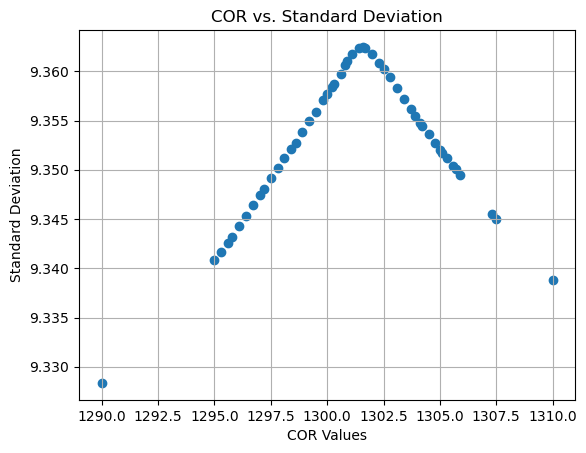

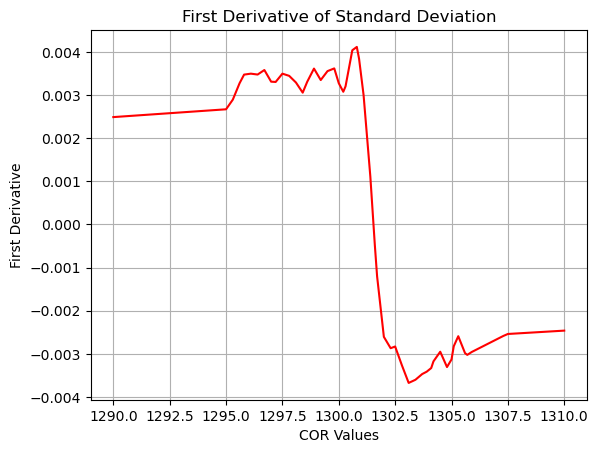

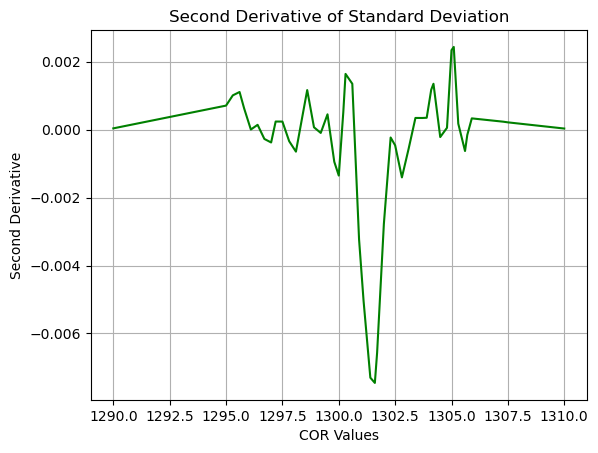

In [62]:
# Scatter plot of COR vs. Standard Deviation
plt.scatter(df_description['COR'], df_description['std_dev'])
plt.xlabel('COR Values')
plt.ylabel('Standard Deviation')
plt.title('COR vs. Standard Deviation')
plt.grid(True)
plt.show()

# Calculate the first and second derivatives of std_dev with respect to COR
first_derivative = np.gradient(df_description['std_dev'], df_description['COR'])
second_derivative = np.gradient(first_derivative, df_description['COR'])

# Plot the first derivative
plt.plot(df_description['COR'], first_derivative, color='red')
plt.xlabel('COR Values')
plt.ylabel('First Derivative')
plt.title('First Derivative of Standard Deviation')
plt.grid(True)
plt.show()

# Plot the second derivative
plt.plot(df_description['COR'], second_derivative, color='green')
plt.xlabel('COR Values')
plt.ylabel('Second Derivative')
plt.title('Second Derivative of Standard Deviation')
plt.grid(True)
plt.show()